#### Topic:      Prework Solutions
#### Cohort:   03_Spring2015
#### Date:        13-Apr-2015
#### Author:     Daniel Shin

Prework: Required Exercises

https://github.com/datascopeanalytics/metis-data-science-bootcamp-prework/blob/master/exercises.md

Source:     Think Stats (section Using the Code), there is some accompanying code and data. You can get these from the Think Stats repository.
https://github.com/AllenDowney/ThinkStats2

------------------------------------------------------------------------------- 

##Table of Contents 
[Exercise01](#1) 

(Think Stats Ex 2.4) 

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length?
 

[Exercise02](#2)

(Think Stats Ex 3.1) 

Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable NUMKDHH to construct the actual distribution for the number of children under 18 in the household.
Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means. As a starting place, you can use chap03ex.ipynb. This is an ipython notebook from the ThinkStats2 repository.


[Exercise03](#3)

(Think Stats Ex 4.2) 

The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.
Generate 1000 numbers from random.random and plot their PMF and CDF. Is the distribution uniform?



[Exercise04](#4)

(Think Stats Ex 7.1) 

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

[Exercise05](#5)

(Think Stats Ex 8.2)

Suppose that you draw a sample with size n = 10 from an exponential distribution with λ = 2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of n and make a plot of standard error versus n.


[Exercise06](#6)

(Think Stats Ex 2.1 Bayes)

The cookie problem is a problem discussed in sections 1.3, 2.2 and 2.3 of Think Bayes. Solve the following problem. In Section 2.3 I said that the solution to the cookie problem generalizes to the case where we draw multiple cookies with replacement. But in the more likely scenario where we eat the cookies we draw, the likelihood of each draw depends on the previous draws.

Modify the solution in this chapter to handle selection without replacement. Hint: add instance variables to Cookie to represent the hypothetical state of the bowls, and modify Likelihood accordingly. You might want to define a Bowl object.


-----------------------------------------------------------------------------------------

### <a id='1'></a> Exercise 1 
(Think Stats Ex 2.4)

a) Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. 

b) Compute Cohen’s d to quantify the difference between the groups. 

c) How does it compare to the difference in pregnancy length?

Note:  Cohen's d is an effect size used to indicate the standardised difference between two means. It can be used, for example, to accompany reporting of t-test and ANOVA results. 

In [3]:
# set working directory
path_data = "/Users/DanShin/Documents/Metis/ThinkStats/ThinkStats2/code"

import os
os.chdir(path_data)

In [4]:
# import modules and define environment

import nsfg
import math
import numpy as np
import thinkstats2
import thinkplot
import sys
import random
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [4]:
# read feminine pregnancy data into pandas dataframe

df = nsfg.ReadFemPreg()

nsfg.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.birthwgt_lb[df.birthwgt_lb > 20] = np.nan


In [5]:
# create variables for first childs and others

live = df[df.outcome == 1]
firsts = live[live.birthord == 1]
others = live[live.birthord > 1]
print "Length of firsts: ", len(firsts)
print "Length of others: ", len(others)

Length of firsts:  4413
Length of others:  4735


In [6]:
# calculate average weights of first childs vs others

firsts_avgwgt = firsts['totalwgt_lb'].mean()
print "Average weight of first child: ", round(firsts_avgwgt, 4)

others_avgwgt = others['totalwgt_lb'].mean()
print "Average weight of others: ", round(others_avgwgt, 4)

Average weight of first child:  7.2011
Average weight of others:  7.3259


####Question: 1a) Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others.
####Answer:   
####On average, first babies are lighter than others (7.20 vs 7.33 lbs)

In [7]:
# Cohen's D function

def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d= diff / math.sqrt(pooled_var)
    return d

In [9]:
# calculate Cohen's D for weight of first child vs others

wgteff = CohenEffectSize(firsts['totalwgt_lb'], others['totalwgt_lb'])
print "Cohen Effect Size: ", round(wgteff, 4)

if wgteff < 0.2:
    print "Effect is trivial"

Cohen Effect Size:  -0.0887
Effect is trivial


c) How does Cohen's D compare to the difference in pregnancy length? 

In [10]:
# calculate Cohen's D for pregnancy length of first child vs others

firsts_avgprg = firsts['prglngth'].mean()
print "Average pregnancy length of first child: ", round(firsts_avgprg, 4)

others_avgprg = others['prglngth'].mean()
print "Average pregnancy length of others: ", round(others_avgprg, 4)

pregeff = CohenEffectSize(firsts['prglngth'], others['prglngth'])
print "Cohen Effect Size: ", round(pregeff, 4)

if wgteff < 0.2:
    print "Effect is trivial"

Average pregnancy length of first child:  38.601
Average pregnancy length of others:  38.5229
Cohen Effect Size:  0.0289
Effect is trivial


-------------------------------------------------------------------------------------------

### <a id='2'></a> Exercise 2 
(Think Stats Ex 3.1)

Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable NUMKDHH to construct the actual distribution for the number of children under 18 in the household.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means. As a starting place, you can use chap03ex.ipynb. This is an ipython notebook from the ThinkStats2 repository.

In [11]:
# read female respondent's data into pandas dataframe

def ReadFemResp(dct_file='2002FemResp.dct',
                dat_file='2002FemResp.dat.gz',
                nrows=None):
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip', nrows=nrows)
    return df

resp = ReadFemResp()

In [12]:
# create PMF for number of kids per household (actual)

numkids_pmf = thinkstats2.Pmf(resp.numkdhh, label = 'actual')

In [13]:
# define a function for the biased PMF

def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    for x,p in pmf.Items():
        new_pmf.Mult(x,x)
    new_pmf.Normalize()
    return new_pmf

In [15]:
# create PMF for number of kids per household (observed)

biased_pmf = BiasPmf(numkids_pmf, label = 'observed')

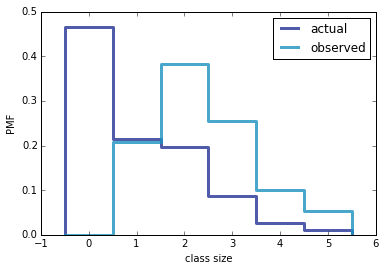

In [17]:
# bar plot of PMFs number of kids per household (actual and observed)

thinkplot.PrePlot(2)
thinkplot.Pmfs([numkids_pmf, biased_pmf])
thinkplot.Show(xlabel = 'class size', ylabel = 'PMF')

In [16]:
# mean number of kids per household (actual and observed)

print "Actual number of kids per household: ", round(numkids_pmf.Mean(), 4)
print "Observed (biased) number of kids per household: ", round(biased_pmf.Mean(), 4)

Actual number of kids per household:  1.0242
Observed (biased) number of kids per household:  2.4037


-------------------------------------------------------------------------------------------

### <a id='3'></a> Exercise 3 
(Think Stats Ex 4.2)

The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.
Generate 1000 numbers from random.random and plot their PMF and CDF. Is the distribution uniform?

In [18]:
# populate a list of 1,000 random numbers from 0 to 1

random_list = []
for i in range(1000):
    random_list.append(random.random())

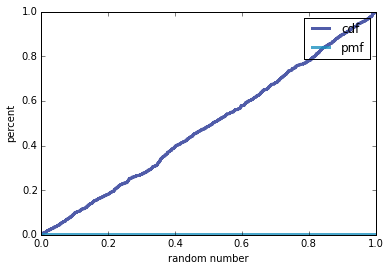

In [19]:
# plot CDF and PMF and 1,000 random numbers

random_cdf = thinkstats2.Cdf(random_list, label="cdf")
random_pmf = thinkstats2.Pmf(random_list, label="pmf")

thinkplot.PrePlot(2)
thinkplot.Cdf(random_cdf)
thinkplot.Pmf(random_pmf)
thinkplot.Show(xlabel = 'random number', ylabel = 'percent')

####Answer:
The probability mass function is uniform and the cummulative density function is linear. Therefore, it can be concluded that the distribution is uniform.

-------------------------------------------------------------------------------------------

### <a id='4'></a> Exercise 4 
(Think Stats Ex 7.1)

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


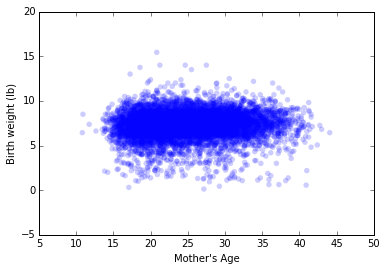

In [20]:
# create a scatter plot of birth weight versus mother's age

thinkplot.Scatter(df.agepreg, df.totalwgt_lb)
thinkplot.Show(xlabel = 'Mother\'s Age', ylabel = 'Birth weight (lb)')

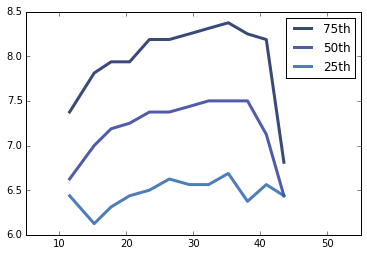

In [21]:
# plot percentiles of birth weight vs mother's age

df = df.dropna(subset = ['agepreg', 'totalwgt_lb'])
bins = np.arange(10, 45, 3)
indices = np.digitize(df.agepreg, bins)
groups = df.groupby(indices)
ages = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

for percent in [75,50,25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(ages, weights, label = label)
thinkplot.Show(axis = [5, 55, 6, 8.5])

In [22]:
# calculate Pearson's correlation coefficient

pearscorr = thinkstats2.Corr(df.agepreg, df.totalwgt_lb)
print "Pearson Correlation Coefficient: ", round(pearscorr, 4)

Pearson Correlation Coefficient:  0.0688


In [23]:
# calculate Spearman's correlation coefficient

spearcorr = thinkstats2.SpearmanCorr(df.agepreg, df.totalwgt_lb)
print "Spearman Correlation Coefficient: ", round(spearcorr, 4)

Spearman Correlation Coefficient:  0.0946


####Answer:
There is a non-linear correlation between the variables

-----------------------------------------------------------------------------------------

### <a id='5'></a> Exercise 5
(Think Stats Ex 8.2)

Suppose that you draw a sample with size n = 10 from an exponential distribution with λ = 2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of n and make a plot of standard error versus n.

In [24]:
# define functions

def Estimate(n=10, m=1000):
    lam = 2
    means = []
    for _ in range(m):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        means.append(L)
    return means

def RMSE(estimates, actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return math.sqrt(mse)

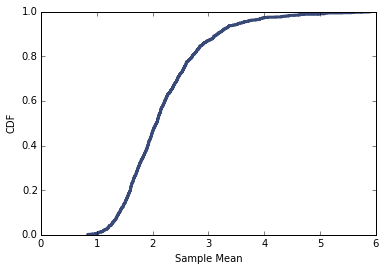

In [25]:
# plot the sampling distribution of the estimate L

estimate = Estimate()
sampdist = thinkstats2.Cdf(estimate)
thinkplot.Cdf(sampdist)
thinkplot.Show(xlabel = 'Sample Mean', ylabel = 'CDF', axis = [0,6,0,1])

In [26]:
# compute standard error and 90% confidence interval

print 'rmse L = ', round(RMSE(estimate, 2),4)
ci = round(sampdist.Percentile(5), 4), round(sampdist.Percentile(95), 4)
print '90% confidence interval: ', ci

rmse L =  0.7875
90% confidence interval:  (1.2723, 3.6011)


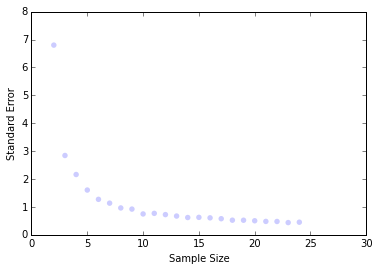

In [27]:
# repeat different values of n and plot standard errors

ns = []
stderrs = []

for i in range(2, 25):
    ns.append(i)
    samp = Estimate(i)
    stderrs.append(RMSE(samp, 2))
                   
thinkplot.Scatter(ns, stderrs)
thinkplot.Show(xlabel = 'Sample Size', ylabel = 'Standard Error')

-----------------------------------------------------------------------------------------

### <a id='6'></a> Exercise 6
(Think Stats Ex 2.1 Bayes)

The cookie problem is a problem discussed in sections 1.3, 2.2 and 2.3 of Think Bayes. Solve the following problem. In Section 2.3 I said that the solution to the cookie problem generalizes to the case where we draw multiple cookies with replacement. But in the more likely scenario where we eat the cookies we draw, the likelihood of each draw depends on the previous draws.

Modify the solution in this chapter to handle selection without replacement. Hint: add instance variables to Cookie to represent the hypothetical state of the bowls, and modify Likelihood accordingly. You might want to define a Bowl object.

In [6]:
bayes_path = "/Users/DanShin/Documents/Metis/ThinkBayes/ThinkBayes"

os.chdir(bayes_path)

from thinkbayes import Pmf
import random

In [7]:
# make adjustments to cookie class to reflect situation without replacement

class Cookie(Pmf):
    """A map from string bowl ID to probablity."""

    def __init__(self, hypos):
        """Initialize self.

        hypos: sequence of string bowl IDs
        """
        Pmf.__init__(self)
        self.hypos = hypos
        for hypo in hypos:
            self.Set(hypo, 1)
        self.Normalize()
        self.bowls = {'Bowl 1':dict(vanilla=30, chocolate=10),
                        'Bowl 2':dict(vanilla=20, chocolate=20)}

    def Update(self, data):
        """Updates the PMF with new data.

        data: string cookie type
        """
        rand = random.choice(self.hypos)
        print "A " + data + " cookie was picked out from " + rand
        self.bowls[rand][data] -= 1
        for hypo in self.Values():
            like = self.Likelihood(data, hypo, rand)
            self.Mult(hypo, like)
        self.Normalize()
        print "New cookie count: ", self.bowls
        for hypo, prob in self.Items():
            print hypo, prob
            self.Set(hypo, 1)
        self.Normalize()
        return None

    def Likelihood(self, data, hypo, rand):
        """The likelihood of the data under the hypothesis.

        data: string cookie type
        hypo: string bowl ID
        """
        bowl = self.bowls[hypo]
        like = float(bowl[data]) / sum(bowl.values())
        return like

In [8]:
# define hypos and call a Cookie class on it

hypos = ["Bowl 1", "Bowl 2"]
pmf = Cookie(hypos)

# pmf.Update("vanilla") or pmf.Update("chocolate") to chose without replacement

In [9]:
pmf.Update("vanilla")

A vanilla cookie was picked out from Bowl 2
New cookie count:  {'Bowl 2': {'vanilla': 19, 'chocolate': 20}, 'Bowl 1': {'vanilla': 30, 'chocolate': 10}}
Bowl 2 0.39378238342
Bowl 1 0.60621761658
